# Pulse Shape Simulation
This part explains how to generate signals for given PET information (position, energy, time) for a given detector

## 0. Intro

First, let's recap LEGEND data processing. The data tiers go like `daq->raw->dsp->hit->evt`
The tier that contains waveforms is `raw`. To see how they look like, I will load some test data. Skip this part if you just wanna go and simulate.

### 0.1. Get test data

Load LEGEND test data (do once)

In [5]:
# get LegendTestData
import Pkg
Pkg.add(url="https://github.com/legend-exp/LegendTestData.jl")
# download test data
Pkg.build("LegendTestData");

    Updating git-repo `https://github.com/legend-exp/LegendTestData.jl`
   Resolving package versions...
    Updating `~/.julia/environments/v1.6/Project.toml`
  [33d6da08] ~ LegendTestData v0.0.0 `https://github.com/legend-exp/LegendTestData.jl.git#master` ⇒ v0.0.0 `https://github.com/legend-exp/LegendTestData.jl#master`
    Updating `~/.julia/environments/v1.6/Manifest.toml`
  [33d6da08] ~ LegendTestData v0.0.0 `https://github.com/legend-exp/LegendTestData.jl.git#master` ⇒ v0.0.0 `https://github.com/legend-exp/LegendTestData.jl#master`
    Building DataDeps → `~/.julia/scratchspaces/44cfe95a-1eb2-52ea-b672-e2afdf69b78f/4f0e41ff461d42cfc62ff0de4f1cd44c6e6b3771/build.log`


In [6]:
# get path to the downloaded test data
using LegendTestData
testdata_path = LegendTestData.legend_test_data_path()
# example raw file
raw_filename = joinpath(testdata_path, "data/lh5", "LDQTA_r117_20200110T105115Z_cal_geds_raw.lh5")

This program has requested access to the data dependency legend-testdata-8d67659.
which is not currently installed. It can be installed automatically, and you will not see this message again.

Dataset: LEGEND Test Data
Authors: The LEGEND Collaboration
Website: https://github.com/legend-exp/legend-testdata.git



Do you want to download the dataset from ["https://api.github.com/repos/legend-exp/legend-testdata/tarball/8d67659"] to "/home/sagitta/.julia/datadeps/legend-testdata-8d67659"?
[y/n]
stdin> y


┌ Info: Downloading
│   source = https://api.github.com/repos/legend-exp/legend-testdata/tarball/8d67659
│   dest = /home/sagitta/.julia/datadeps/legend-testdata-8d67659/legend-exp-legend-testdata-8d67659.tar.gz
│   progress = NaN
│   time_taken = 5.0 s
│   time_remaining = NaN s
│   average_speed = 1.011 MiB/s
│   downloaded = 5.056 MiB
│   remaining = ∞ B
│   total = ∞ B
└ @ HTTP /home/sagitta/.julia/packages/HTTP/CGviq/src/download.jl:128
┌ Info: Downloading
│   source = https://api.github.com/repos/legend-exp/legend-testdata/tarball/8d67659
│   dest = /home/sagitta/.julia/datadeps/legend-testdata-8d67659/legend-exp-legend-testdata-8d67659.tar.gz
│   progress = NaN
│   time_taken = 10.01 s
│   time_remaining = NaN s
│   average_speed = 1.099 MiB/s
│   downloaded = 11.002 MiB
│   remaining = ∞ B
│   total = ∞ B
└ @ HTTP /home/sagitta/.julia/packages/HTTP/CGviq/src/download.jl:128
┌ Info: Downloading
│   source = https://api.github.com/repos/legend-exp/legend-testdata/tarball/8d67659



7-Zip (a) [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,4 CPUs Intel(R) Core(TM) i7-6600U CPU @ 2.60GHz (406E3),ASM,AES-NI)


Extracting archive: 
--
Path = 
Type = tar
Code Page = UTF-8

Everything is Ok

Folders: 8
Files: 8
Size:       27764929
Compressed: 13312


"/home/sagitta/.julia/datadeps/legend-testdata-8d67659/data/lh5/LDQTA_r117_20200110T105115Z_cal_geds_raw.lh5"

### 0.2. Look at some real waveforms

In [7]:
# get some packages to read HDF5 files
using HDF5
using LegendHDF5IO

In [12]:
# take a look at the file
raw_file = h5open(raw_filename)

🗂️ HDF5.File: (read-only) /home/sagitta/.julia/datadeps/legend-testdata-8d67659/data/lh5/LDQTA_r117_20200110T105115Z_cal_geds_raw.lh5
└─ 📂 geds
   └─ 📂 raw
      ├─ 🏷️ datatype
      ├─ 🔢 baseline
      │  └─ 🏷️ datatype
      ├─ 🔢 channel
      │  └─ 🏷️ datatype
      ├─ 🔢 energy
      │  └─ 🏷️ datatype
      ├─ 🔢 ievt
      │  └─ 🏷️ datatype
      ├─ 🔢 numtraces
      │  └─ 🏷️ datatype
      ├─ 🔢 packet_id
      │  └─ 🏷️ datatype
      ├─ 🔢 timestamp
      │  ├─ 🏷️ datatype
      │  └─ 🏷️ units
      ├─ 📂 tracelist
      │  ├─ 🏷️ datatype
      │  ├─ 🔢 cumulative_length
      │  │  └─ 🏷️ datatype
      │  └─ 🔢 flattened_data
      │     └─ 🏷️ datatype
      ├─ 📂 waveform
      │  ├─ 🏷️ datatype
      │  ├─ 🔢 dt
      │  │  ├─ 🏷️ datatype
      │  │  └─ 🏷️ units
      │  ├─ 🔢 t0
      │  │  ├─ 🏷️ datatype
      │  │  └─ 🏷️ units
      │  └─ 🔢 values
      │     └─ 🏷️ datatype
      ├─ 🔢 wf_max
      │  └─ 🏷️ datatype
      └─ 🔢 wf_std
         └─ 🏷️ datatype

In [11]:
# read it
raw_table = h5open(raw_filename, "r") do input LegendHDF5IO.readdata(input, "geds/raw") end

Table with 11 columns and 100 rows:
      packet_id  ievt  timestamp   numtraces  tracelist  baseline  energy  ⋯
    ┌───────────────────────────────────────────────────────────────────────
 1  │ 1          0     0.79466 s   1          Int16[53]  13722     3304    ⋯
 2  │ 2          0     0.796899 s  1          Int16[60]  13044     8642    ⋯
 3  │ 3          0     0.799604 s  1          Int16[40]  13508     9177    ⋯
 4  │ 4          0     0.799604 s  1          Int16[41]  11891     13015   ⋯
 5  │ 5          1     0.801617 s  1          Int16[60]  14353     3794    ⋯
 6  │ 6          2     0.807322 s  1          Int16[60]  14254     10737   ⋯
 7  │ 7          3     0.812459 s  1          Int16[64]  14525     3639    ⋯
 8  │ 8          0     0.812317 s  1          Int16[47]  11656     22085   ⋯
 9  │ 9          1     0.813281 s  1          Int16[53]  13576     8938    ⋯
 10 │ 10         4     0.813282 s  1          Int16[60]  14341     26636   ⋯
 11 │ 11         5     0.81352 s   1    

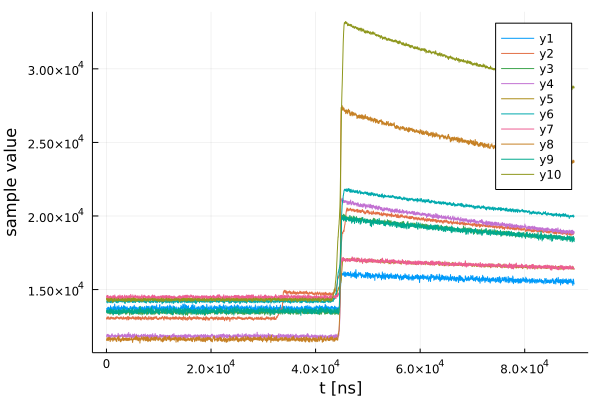

In [13]:
# plot some waveforms
using Plots
plot(raw_table.waveform[1:10])

Now, the goal of LegendGeSim is to simulate the detector, simulate pulses coming from given events, and finally simulate what happens to them after they get through the DAQ setup, and make them look like this plot

## 1. Simulate signals

First things first, we need some events from which we're generating signals. I use output of g4simple, but anything that has PET (position-energy-time) information will do.

In [18]:
# there is a file like this in legend-test-data but there are too many events.
# this is a smaller snippet
pet_filename = "dual-invcoax-th228-geant4_small.csv"
pet_full_path = joinpath("data", pet_filename)

"data/dual-invcoax-th228-geant4_small.csv"

### 1.0. Input events
Let's look at the spectrum (skip if you don't care or if you need to install too many packages for this)

In [26]:
using LegendTextIO
pet_table = open(pet_full_path , Geant4CSVInput) do io read(io) end

Table with 5 columns and 71 rows:
      evtno  detno                 thit                  edep                  ⋯
    ┌───────────────────────────────────────────────────────────────────────────
 1  │ 2      Int32[1, 1, 1, 1, 1…  Quantity{Float32, 𝐓…  Quantity{Float32, 𝐋…  ⋯
 2  │ 7      Int32[1, 1, 1, 1, 1…  Quantity{Float32, 𝐓…  Quantity{Float32, 𝐋…  ⋯
 3  │ 12     Int32[1, 1, 1, 1, 1…  Quantity{Float32, 𝐓…  Quantity{Float32, 𝐋…  ⋯
 4  │ 13     Int32[1, 1, 1, 1, 1…  Quantity{Float32, 𝐓…  Quantity{Float32, 𝐋…  ⋯
 5  │ 16     Int32[2, 2, 2, 2, 2…  Quantity{Float32, 𝐓…  Quantity{Float32, 𝐋…  ⋯
 6  │ 17     Int32[1, 1, 1, 1, 1…  Quantity{Float32, 𝐓…  Quantity{Float32, 𝐋…  ⋯
 7  │ 24     Int32[2, 2, 2, 2, 2…  Quantity{Float32, 𝐓…  Quantity{Float32, 𝐋…  ⋯
 8  │ 40     Int32[1, 1, 1, 1, 1…  Quantity{Float32, 𝐓…  Quantity{Float32, 𝐋…  ⋯
 9  │ 44     Int32[1, 1, 1, 1, 1…  Quantity{Float32, 𝐓…  Quantity{Float32, 𝐋…  ⋯
 10 │ 55     Int32[2, 2, 2, 2, 2…  Quantity{Float32, 𝐓…  Quantity{Float32, 

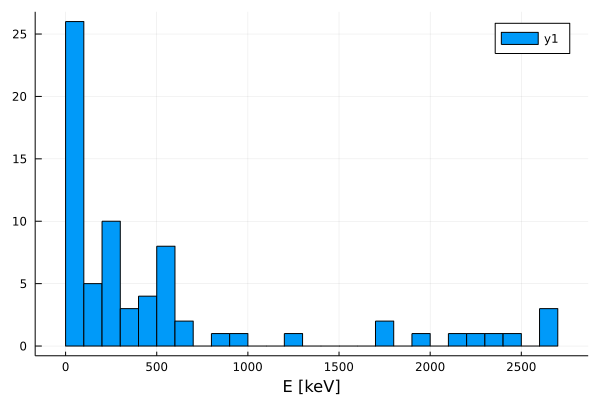

In [24]:
using Unitful
using Plots
histogram(sum.(ustrip.(pet_table.edep)), bins=25, xlabel="E [keV]")